In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Data Loading

In [20]:
path = Path('/home/jupyter/kaggle/dog-breeds-identification/')
LABELS = path/'labels.csv'
TRAIN =  path/'train'

In [22]:
TRAIN

PosixPath('/home/jupyter/kaggle/dog-breeds-identification/train')

In [23]:
data = ImageDataBunch.from_csv(TRAIN, csv_labels = LABELS, suffix='.jpg', 
                               ds_tfms=get_transforms(do_flip=False), size = 299, bs=24)

data.normalize(imagenet_stats)

In [24]:
learn2 = ConvLearner(data, arch=models.resnet50, metrics=error_rate)

In [25]:
learn2.fit_one_cycle(5)

Total time: 06:13
epoch  train loss  valid loss  error_rate
1      1.142732    0.637599    0.202219    (01:20)
2      0.982194    0.587640    0.193646    (01:13)
3      0.786119    0.528339    0.154312    (01:13)
4      0.511030    0.418618    0.122542    (01:13)
5      0.339278    0.395242    0.111952    (01:13)



In [26]:
learn2.save('Dog-Breed-50')

In [27]:
learn2.unfreeze()

In [28]:
learn2.fit_one_cycle(1)

Total time: 01:37
epoch  train loss  valid loss  error_rate
1      2.177394    1.423938    0.419062    (01:37)



In [29]:
learn2.lr_find()

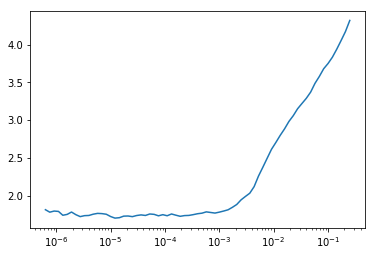

In [30]:
learn2.recorder.plot()

In [35]:
learn2.load('Dog-Breed-50')

In [36]:
learn2.lr_find()

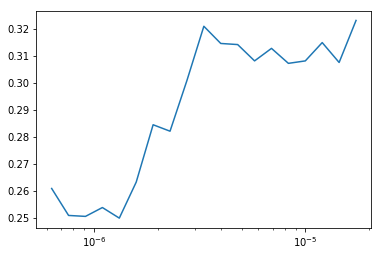

In [37]:
learn2.recorder.plot()

In [39]:
learn2.fit_one_cycle(2, max_lr=slice(10e-7,10e-4))

Total time: 03:10
epoch  train loss  valid loss  error_rate
1      0.487317    0.509102    0.151790    (01:35)
2      0.277557    0.443398    0.128089    (01:35)



In [40]:
accuracy(*learn2.TTA())

Total time: 01:44



tensor(0.8729)